# 0. Utils

In [1]:
def print_dictionary(dictionary, n=5):
    i = 0
    keys = dictionary.keys()
    keys = list(keys)
    while (i < len(keys)) and (i < n):
        key = keys[i]
        value = dictionary[key]
        print("'{}': {}".format(key, value))
        i+=1

In [2]:
import matplotlib.pyplot as plt
# Plot data to see relationship in training and validation data
def plot_accuracy(hist):
    epoch_list=list(range(1, len(hist.history['accuracy']) + 1)) # values for x axis [1, 2, 3, 4, ..., # of epochs]
    plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
    plt.legend(('Training Accuracy', 'Validation Accuracy'))
    plt.show()
    return 0


# 1. Importing the Datasets

In [3]:
import pandas as pd
import numpy as np

In [4]:
dataset_path = '../../dataset/'

In [5]:
df_news = pd.read_csv(dataset_path + '/news/news [only_date].csv')
df_price = pd.read_csv(dataset_path + '/price/btc_usd_daily.csv')

### Headlines

In [6]:
df_news.head()

,date,headline,source
0,2020-03-16,"Bitcoin Risks Falling to $2,900 if Market is H...",https://www.newsbtc.com/2020/03/14/bitcoin-ris...
1,2020-03-16,"Here’s Why Bitcoin Didn’t Bottom at $3,800 Acc...",https://www.newsbtc.com/2020/03/15/heres-why-b...
2,2020-03-16,"Bitcoin Sinks to $4,390 as Dow’s 1,000-Point D...",https://www.newsbtc.com/2020/03/16/bitcoin-sin...
3,2020-03-16,Bitcoin could soon be in the museum of illusio...,https://eng.ambcrypto.com/bitcoin-could-soon-b...
4,2020-03-16,Bitcoin Price Analysis: BTC’s 3-Day Consolidat...,https://cryptopotato.com/bitcoin-price-analysi...


In [7]:
df_news.shape

(17047, 3)

### Prices

In [8]:
df_price.head()

,date,open,close,high,low,change,volume,market_cap
0,2020-03-24,6436.64,6734.80,6789.02,6411.07,4.63,48221910672,123148917787
1,2020-03-23,5831.37,6416.31,6443.93,5785.00,10.03,46491916000,117314776187
2,2020-03-22,6185.56,5830.25,6359.70,5823.71,-5.74,40099664740,106591196069
3,2020-03-21,6206.52,6185.07,6378.14,5932.82,-0.35,42494390880,113068192795
4,2020-03-20,6191.65,6198.78,6844.26,5865.78,0.12,54442976103,113309245860


In [9]:
df_price.shape

(2522, 8)

# 2. Preprocessing

### Prices

In [10]:
# Check whether each element in the df_news matches an element in the df_price
df_news[df_news.date.isin(df_price.date)].shape

(17047, 3)

In [11]:
# Hold only df_price entries which matches same date interval with df_news
df_price = df_price.loc[df_price['date'].isin(df_news['date'])]
df_price

,date,open,close,high,low,change,volume,market_cap
8,2020-03-16,5385.23,5014.48,5385.23,4575.36,-6.88,45368026430,91633478850
9,2020-03-15,5201.07,5392.31,5836.65,5169.28,3.68,33997889639,98530059890
10,2020-03-14,5573.08,5200.37,5625.23,5125.07,-6.69,36154506008,95014981944
11,2020-03-13,5017.83,5563.71,5838.11,4106.98,10.88,74156772075,101644613038
12,2020-03-12,7913.62,4970.79,7929.12,4860.35,-37.19,53980357243,90804613601
...,...,...,...,...,...,...,...,...
1174,2017-01-05,1156.73,1013.38,1191.10,910.42,-12.39,510199008,16300254795
1175,2017-01-04,1044.40,1154.73,1159.42,1044.40,10.56,344945984,18571869009
1176,2017-01-03,1021.60,1043.84,1044.08,1021.60,2.18,185168000,16786368910
1177,2017-01-02,998.62,1021.75,1031.39,996.70,2.32,222184992,16429024775


### Headlines

In [12]:
# Create a list of daily headlines from the news
daily_headlines = []

for row in df_price.iterrows():

    headlines = []    
    date = row[1]['date']

    for news_row in df_news[df_news['date'] == date].iterrows():
        headline = news_row[1]['headline']
        headlines.append(headline)
        
    # Track progress
    daily_headlines.append(headlines)

In [13]:
# Compare lengths to ensure they are the same
print(len(df_price))
print(len(daily_headlines))

1128
1128


In [14]:
daily_headlines[0]

['Bitcoin Risks Falling to $2,900 if Market is Heading for Long-Term lower low',
 'Here’s Why Bitcoin Didn’t Bottom at $3,800 According to a Top analyst',
 'Bitcoin Sinks to $4,390 as Dow’s 1,000-Point Drop Risks Bigger breakdown',
 'Bitcoin could soon be in the museum of illusions: ex Director-General ECB',
 'Bitcoin Price Analysis: BTC’s 3-Day Consolidation Is Likely To End By Huge Move Very Soon',
 '‘Extreme Fear’ Grips Markets Despite Oversold Bitcoin Price Metrics',
 'Bitcoin (BTC) Price Bottom Might Be Already In. Trader Explains Why',
 'Bitcoin Trading Near Make-or-Break Levels: Can Bulls Make It?',
 'Here’s How Bitcoin’s Market Cap Would Look Like in 3D',
 'Bitcoin Fails to Jump $6,000, Top Analyst Warns Further Breakdown',
 '1 of BitMEX’s Most Profitable Traders Still Thinks Bitcoin Will Hit $30,000',
 'Bitcoin Mempool Briefly Drops to Zero on Blockchain.\u200bcom',
 'Despite Bitcoin Price Dips, Crypto Is a Safe Haven in the Middle East',
 'Bitcoin Price Tops $5.9K as Fed Cuts

# 3. Cleaning

In [15]:
import re

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [16]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [17]:
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

In [18]:
def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'0,0', '00', text) 
    text = re.sub(r'[_"\-;%()|.,+&=*%.,!?:#@\[\]]', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'\$', ' $ ', text)
    text = re.sub(r'j k ', ' jk ', text)
    text = re.sub(r' s ', ' ', text)
    text = re.sub(r' yr ', ' year ', text)
    text = re.sub(r' l g b t ', ' lgbt ', text)
    
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text

In [19]:
stemmer = PorterStemmer()

In [20]:
# Clean the headlines
cleaned_daily_headlines = []

for headlines in daily_headlines:
    cleaned_headlines = []
    for headline in headlines:
        cleaned_headlines.append(clean_text(headline))
    cleaned_daily_headlines.append(cleaned_headlines)

In [21]:
daily_headlines[0]

['Bitcoin Risks Falling to $2,900 if Market is Heading for Long-Term lower low',
 'Here’s Why Bitcoin Didn’t Bottom at $3,800 According to a Top analyst',
 'Bitcoin Sinks to $4,390 as Dow’s 1,000-Point Drop Risks Bigger breakdown',
 'Bitcoin could soon be in the museum of illusions: ex Director-General ECB',
 'Bitcoin Price Analysis: BTC’s 3-Day Consolidation Is Likely To End By Huge Move Very Soon',
 '‘Extreme Fear’ Grips Markets Despite Oversold Bitcoin Price Metrics',
 'Bitcoin (BTC) Price Bottom Might Be Already In. Trader Explains Why',
 'Bitcoin Trading Near Make-or-Break Levels: Can Bulls Make It?',
 'Here’s How Bitcoin’s Market Cap Would Look Like in 3D',
 'Bitcoin Fails to Jump $6,000, Top Analyst Warns Further Breakdown',
 '1 of BitMEX’s Most Profitable Traders Still Thinks Bitcoin Will Hit $30,000',
 'Bitcoin Mempool Briefly Drops to Zero on Blockchain.\u200bcom',
 'Despite Bitcoin Price Dips, Crypto Is a Safe Haven in the Middle East',
 'Bitcoin Price Tops $5.9K as Fed Cuts

In [22]:
cleaned_daily_headlines[0]

['bitcoin risks falling $ 2 900 market heading long term lower low',
 'here’s bitcoin didn’t bottom $ 3 800 according top analyst',
 'bitcoin sinks $ 4 390 dow’s 1 000 point drop risks bigger breakdown',
 'bitcoin could soon museum illusions ex director general ecb',
 'bitcoin price analysis btc’s 3 day consolidation likely end huge move soon',
 '‘extreme fear’ grips markets despite oversold bitcoin price metrics',
 'bitcoin btc price bottom might already trader explains',
 'bitcoin trading near make break levels bulls make',
 'here’s bitcoin’s market cap would look like 3d',
 'bitcoin fails jump $ 6 000 top analyst warns breakdown',
 '1 bitmex’s profitable traders still thinks bitcoin hit $ 30000',
 'bitcoin mempool briefly drops zero blockchain \u200bcom',
 'despite bitcoin price dips crypto safe middle east',
 'bitcoin price tops $ 5 9k fed cuts interest rates 0 restarts qe']

# 4. Word Vectors

In [23]:
# Load Glove word vectors of the vocabulary which is created externally
csv_file = "word_vectors.csv"

embeddings = {}

df_word_vectors = pd.read_csv(csv_file)

for row in df_word_vectors.iterrows():
    word = row[1]['key']
    vector = row[1]['vector']
    
    vector = vector[1:]
    vector = vector[:-1]
    
    new_points = []
    points = vector.split(', ')
    
    for point in points:
        point = round(float(point), 4)
        new_points.append(point)
    
    embeddings[word] = new_points
    
del df_word_vectors

In [24]:
# Check if value matches len(vocab_to_int)
print(len(embeddings))

12531


In [25]:
example_word_vector = embeddings['bitcoin']
np.array(example_word_vector).reshape(1, len(example_word_vector))

array([[ 0.5617, -0.4218,  0.4806, -0.4225, -0.2679, -0.3209, -0.912 ,
        -0.9096, -0.5675,  0.9415, -0.2629, -0.3466,  0.4338, -0.2826,
         0.2644, -0.4312, -0.5574, -1.    , -0.9863,  0.6394,  0.9279,
         0.7645, -0.9167,  0.5244,  0.7897,  0.8154,  0.978 ,  0.092 ,
        -0.5521,  0.0411, -0.7062,  0.2137,  0.8611,  0.6348, -0.3065,
         0.4463,  0.8689,  0.6724, -0.5826,  0.2383, -0.7589,  0.1618,
        -0.2726,  0.9011,  0.2656,  0.2292, -0.5403, -0.7686, -0.4515,
        -0.8293, -0.723 , -0.7331,  0.244 ,  0.4797,  0.8089, -0.3421,
         0.3189,  0.9645,  0.6748,  0.4616, -0.5703,  0.0386, -0.4626,
         0.7908, -0.2842, -0.4153, -0.1122,  0.5307, -0.8728, -0.089 ,
        -0.9393,  0.7892, -0.6934, -0.9863, -0.3766,  0.9389, -0.8788,
         0.3495, -0.8294, -0.5417, -0.9383,  0.1929,  0.552 ,  0.0729,
         0.1723,  0.4606, -0.9398,  0.3593, -0.8251,  0.222 ,  0.5292,
        -0.5941,  0.2026,  0.2118,  0.3753,  0.2143, -0.5235,  0.7716,
      

In [26]:
# Check if value matches len(vocab_to_int)
print(len(embeddings))

12531


# 5. Vocabulary

In [27]:
# Find the number of times each word was used and the size of the vocabulary
word_counts = {}

for daily_headlines in cleaned_daily_headlines:
    for headline in daily_headlines:
        for word in headline.split():
            if word not in word_counts:
                word_counts[word] = 1
            else:
                word_counts[word] += 1

print("the size of the vocabulary is {}.".format(len(word_counts)))

the size of the vocabulary is 16089.


In [28]:
# Limit the vocab that we will use to words
vocab_to_int = {}

value = 0
threshold = 100
for word, count in word_counts.items():
    if count >= threshold or word in embeddings.keys():
        vocab_to_int[word] = value
        value += 1

In [29]:
# Special tokens that will be added to our vocab
codes = ["<UNK>","<PAD>"]   

# Add codes to vocab
for code in codes:
    vocab_to_int[code] = len(vocab_to_int)

In [30]:
# Convert integers to words
int_to_vocab = {}
for word, value in vocab_to_int.items():
    int_to_vocab[value] = word

In [31]:
keys = int_to_vocab.keys()
len(list(keys))

12531

In [32]:
print_dictionary(int_to_vocab, 10)

'0': bitcoin
'1': risks
'2': falling
'3': $
'4': 2
'5': 900
'6': market
'7': heading
'8': long
'9': term


In [33]:
print_dictionary(vocab_to_int, 10)

'bitcoin': 0
'risks': 1
'falling': 2
'$': 3
'2': 4
'900': 5
'market': 6
'heading': 7
'long': 8
'term': 9


In [34]:
vocabulary_size = len(vocab_to_int)
vocabulary_size

12531

In [35]:
usage_ratio = round(len(vocab_to_int) / len(word_counts),4)*100

print("Total Number of Unique Words:", len(word_counts))
print("Number of Words we will use:", len(vocab_to_int))
print("Percent of Words we will use: {}%".format(usage_ratio))

Total Number of Unique Words: 16089
Number of Words we will use: 12531
Percent of Words we will use: 77.89%


In [36]:
# Change the text from words to integers
# If word is not in vocab, replace it with <UNK> (unknown)

total_word_count = 0
unknown_word_count = 0

headlines_to_int = []

for headlines in cleaned_daily_headlines:
    daily_headlines_to_int = []
    for headline in headlines:
        headline_to_int = []
        for word in headline.split():
            total_word_count += 1
            if word in vocab_to_int:
                headline_to_int.append(vocab_to_int[word])
            else:
                headline_to_int.append(vocab_to_int['<UNK>'])
                unknown_word_count += 1
        daily_headlines_to_int.append(headline_to_int)
    headlines_to_int.append(daily_headlines_to_int)

In [37]:
unknown_percentage  = round(unknown_word_count/total_word_count, 4) * 100
print("Total number of words in headlines:", total_word_count)
print("Total number of UNKs in headlines:", unknown_word_count)
print("Percent of words that are UNK: {}%".format(unknown_percentage))

Total number of words in headlines: 167512
Total number of UNKs in headlines: 8332
Percent of words that are UNK: 4.97%


In [38]:
headlines_to_int[0]

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [12529, 0, 12529, 12, 3, 13, 14, 15, 16, 17],
 [0, 18, 3, 19, 20, 12529, 21, 22, 23, 24, 1, 25, 26],
 [0, 27, 28, 29, 30, 31, 32, 33, 34],
 [0, 35, 36, 12529, 13, 37, 38, 39, 40, 41, 42, 28],
 [12529, 12529, 43, 44, 45, 46, 0, 35, 47],
 [0, 48, 35, 12, 49, 50, 51, 52],
 [0, 53, 54, 55, 56, 57, 58, 55],
 [12529, 59, 6, 60, 61, 62, 63, 64],
 [0, 65, 66, 3, 67, 22, 16, 17, 68, 26],
 [21, 12529, 69, 70, 71, 72, 0, 73, 3, 74],
 [0, 75, 76, 77, 78, 79, 12529],
 [45, 0, 35, 80, 81, 82, 83, 84],
 [0, 35, 85, 3, 86, 87, 88, 89, 90, 91, 92, 93, 94]]

In [39]:
# Find the length of headlines
lengths = []
for headlines in headlines_to_int:
    for headline in headlines:
        lengths.append(len(headline))

# Create a dataframe so that the values can be inspected
lengths = pd.DataFrame(lengths, columns=['counts'])

In [40]:
lengths.describe()

,counts
count,17047.000000
mean,9.826480
std,3.030185
min,1.000000
25%,8.000000
50%,9.000000
75%,12.000000
max,21.000000


In [41]:
# Limit the lenght of a day's news to 200 words, and the length of any headline to 16 words.
# These values are chose to not have an excessively long training time and 
# balance the number of headlines used and the number of words from each headline.

max_headline_length = 16
max_daily_length = 200
padded_daily_headlines = []

for daily_headlines in headlines_to_int:
    padded_headlines = []
    for headline in daily_headlines:
        
        # Add headline if it is less than max_length
        if len(headline) <= max_headline_length:
            for word in headline:
                padded_headlines.append(word)
                
        # Limit headline if it is more than max_length
        else:
            headline = headline[:max_headline_length]
            for word in headline:
                padded_headlines.append(word)
    
    # Pad padded_headlines if they are less than max_daily_length
    if(len(padded_headlines) < max_daily_length):
        pad = vocab_to_int['<PAD>']
        for i in range(max_daily_length - len(padded_headlines)):
            padded_headlines.append(pad)
            
    # Limit padded_headlines if they are more than max_daily_length
    else:
        padded_headlines = padded_headlines[:max_daily_length]
        
    
    padded_daily_headlines.append(padded_headlines)

In [42]:
padded_daily_headlines = np.reshape(padded_daily_headlines, (len(padded_daily_headlines), max_daily_length))
padded_daily_headlines.shape

(1128, 200)

In [43]:
padded_daily_headlines[750]

array([  527,  7227,   103,   156,    61,    55,  4709, 12529,   789,
        6633,    50,  9316,  1450, 12529,  7385,   174,  1231,  4096,
        1269,  4950,   369,  9317,  3983,    49, 12530, 12530, 12530,
       12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530,
       12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530,
       12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530,
       12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530,
       12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530,
       12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530,
       12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530,
       12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530,
       12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530,
       12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530,
       12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530,
       12530, 12530,

### Get Embedding layer weights

In [44]:
# Need to use 300 features for embedding dimensions to match Glove's vectors
embedding_dimension = 300

vocabulary_size = len(vocab_to_int)

# Create a matrix with default values of zero
word_vectors = np.zeros((vocabulary_size, embedding_dimension))

for word, i in vocab_to_int.items():
    if word in embeddings.keys():
        word_vectors[i] = embeddings[word]
    else:
        # If word not in GloVe, create a random embedding for it
        random_word_vector = np.array(np.random.uniform(-1.0, 1.0, embedding_dimension))
        glove_word_vectors[word] = random_word_vector
        word_vectors[i] = random_word_vector

# 6. Preparing Datasets

In [45]:
from sklearn import preprocessing

In [46]:
label = df_price['change'].apply(lambda x: 1 if x>0 else 0)
y = label.values

In [47]:
y = np.array(y).reshape((y.size, 1))
y.shape

(1128, 1)

In [48]:
y

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

# 7. Train and Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# Split data into training and testing sets.
# Validating data will be created during training.
test_size=0.20

(x_train, x_test) = train_test_split(padded_daily_headlines, 
                                               test_size = test_size, 
                                               random_state = 2)

(y_train, y_test) = train_test_split(y, 
                                     test_size=test_size, 
                                     random_state=2)

In [51]:
x_train[0]

array([12529,    12,  1617,  2081,  6588,   646,  1112, 12529,  2980,
         254,    48, 12529,   202,     0,   149,   108,   109,  6589,
         624, 12529,    17,  6176,     0,  1089,  4831,  1743,   515,
           3,    86,    14,    16,  1171,  1782,   580,     0,   677,
         605,     0,   785,  1356,  1791,   689,   827,  4032,  3567,
        3858,    35,    36,   223,    13,    27,    48,    35,    73,
           3,    21,    86,   384,  5375,  6590,  4785,   671,     0,
          48,   983,   516,   449,     3,    86,   343,     6,    58,
        6591,     0,    35,  4474,     3,    86,   343,  1086,   416,
        4760, 12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530,
       12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530,
       12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530,
       12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530,
       12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530, 12530,
       12530, 12530,

# 8. Load the Model

In [52]:
from keras.models import load_model
from keras.utils import plot_model
model = load_model('model-0.6238937973976135.h5')

Using TensorFlow backend.
C:\Users\Mert\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [53]:
batch_size=128

In [54]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 300)          3759300   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 200, 64)           153664    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 64)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 128)           131200    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 12, 128)           0   

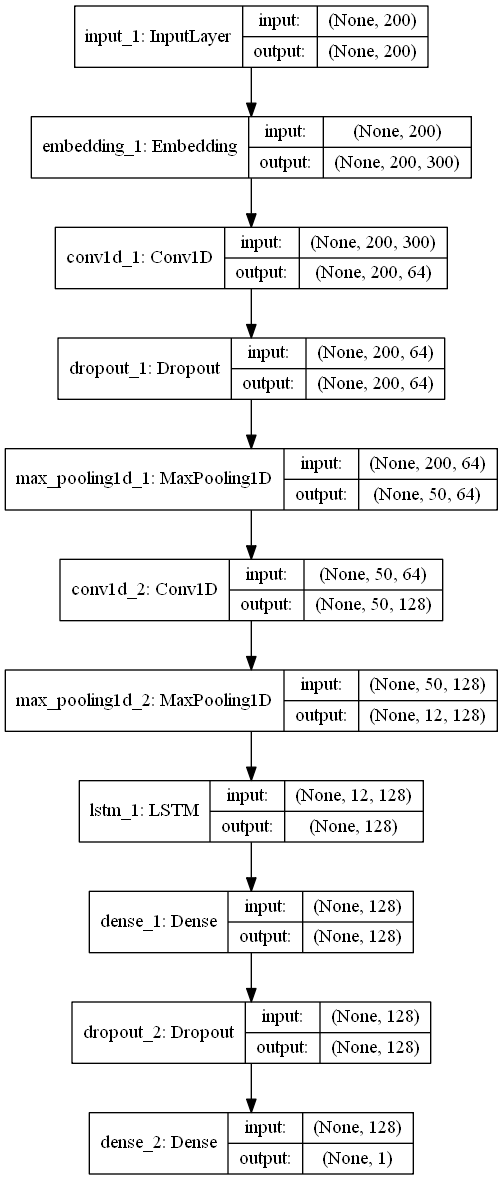

In [55]:
plot_model(model, show_shapes=True, to_file='model.png')

In [56]:
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

226/226 [==============================] - 2s 8ms/step
Test score: 0.24544845732439935
Test accuracy: 0.6238937973976135


In [57]:
## Import library to check other metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [58]:
predictions = model.predict(x_test)

In [59]:
matrix = confusion_matrix(y_test, predictions.round())
print('confusion_matrix')
print(matrix)

confusion_matrix
[[57 50]
 [35 84]]


In [60]:
report = classification_report(y_test, predictions.round())
print(report)

              precision    recall  f1-score   support

           0       0.62      0.53      0.57       107
           1       0.63      0.71      0.66       119

    accuracy                           0.62       226
   macro avg       0.62      0.62      0.62       226
weighted avg       0.62      0.62      0.62       226

